## Exploratory Data Analysis (EDA)

#### Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✅ Libraries imported")

✅ Libraries imported


#### Load Data

In [14]:
# Load dataset
df = pd.read_csv('../data/raw/data.csv')
print(f"✅ Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

✅ Data loaded: 95,662 rows × 16 columns


#### Overview of the Data

In [15]:
print("=== OVERVIEW OF THE DATA ===")
print(f"• Number of rows: {df.shape[0]:,}")
print(f"• Number of columns: {df.shape[1]}")
print(f"• Data types distribution:")
print(df.dtypes.value_counts())

print("\n• Dataset Info:")
df.info()

=== OVERVIEW OF THE DATA ===
• Number of rows: 95,662
• Number of columns: 16
• Data types distribution:
object     11
int64       4
float64     1
Name: count, dtype: int64

• Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-n

#### Summary Statistics

In [16]:
print("=== SUMMARY STATISTICS ===")

print("\n• Numerical Columns Summary:")
# Select numerical columns (exclude ID columns)
num_cols = df.select_dtypes(include=[np.number]).columns
exclude_ids = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']
num_cols = [col for col in num_cols if col not in exclude_ids]

if len(num_cols) > 0:
    display(df[num_cols].describe())

print("\n• Categorical Columns Summary:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        print(f"  Value counts: {df[col].value_counts().to_dict()}")


=== SUMMARY STATISTICS ===

• Numerical Columns Summary:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



• Categorical Columns Summary:

TransactionId:
  Unique values: 95662

BatchId:
  Unique values: 94809

AccountId:
  Unique values: 3633

SubscriptionId:
  Unique values: 3627

CustomerId:
  Unique values: 3742

CurrencyCode:
  Unique values: 1
  Value counts: {'UGX': 95662}

ProviderId:
  Unique values: 6
  Value counts: {'ProviderId_4': 38189, 'ProviderId_6': 34186, 'ProviderId_5': 14542, 'ProviderId_1': 5643, 'ProviderId_3': 3084, 'ProviderId_2': 18}

ProductId:
  Unique values: 23

ProductCategory:
  Unique values: 9
  Value counts: {'financial_services': 45405, 'airtime': 45027, 'utility_bill': 1920, 'data_bundles': 1613, 'tv': 1279, 'ticket': 216, 'movies': 175, 'transport': 25, 'other': 2}

ChannelId:
  Unique values: 4
  Value counts: {'ChannelId_3': 56935, 'ChannelId_2': 37141, 'ChannelId_5': 1048, 'ChannelId_1': 538}

TransactionStartTime:
  Unique values: 94556


#### Distribution of Numerical Features

=== DISTRIBUTION OF NUMERICAL FEATURES ===


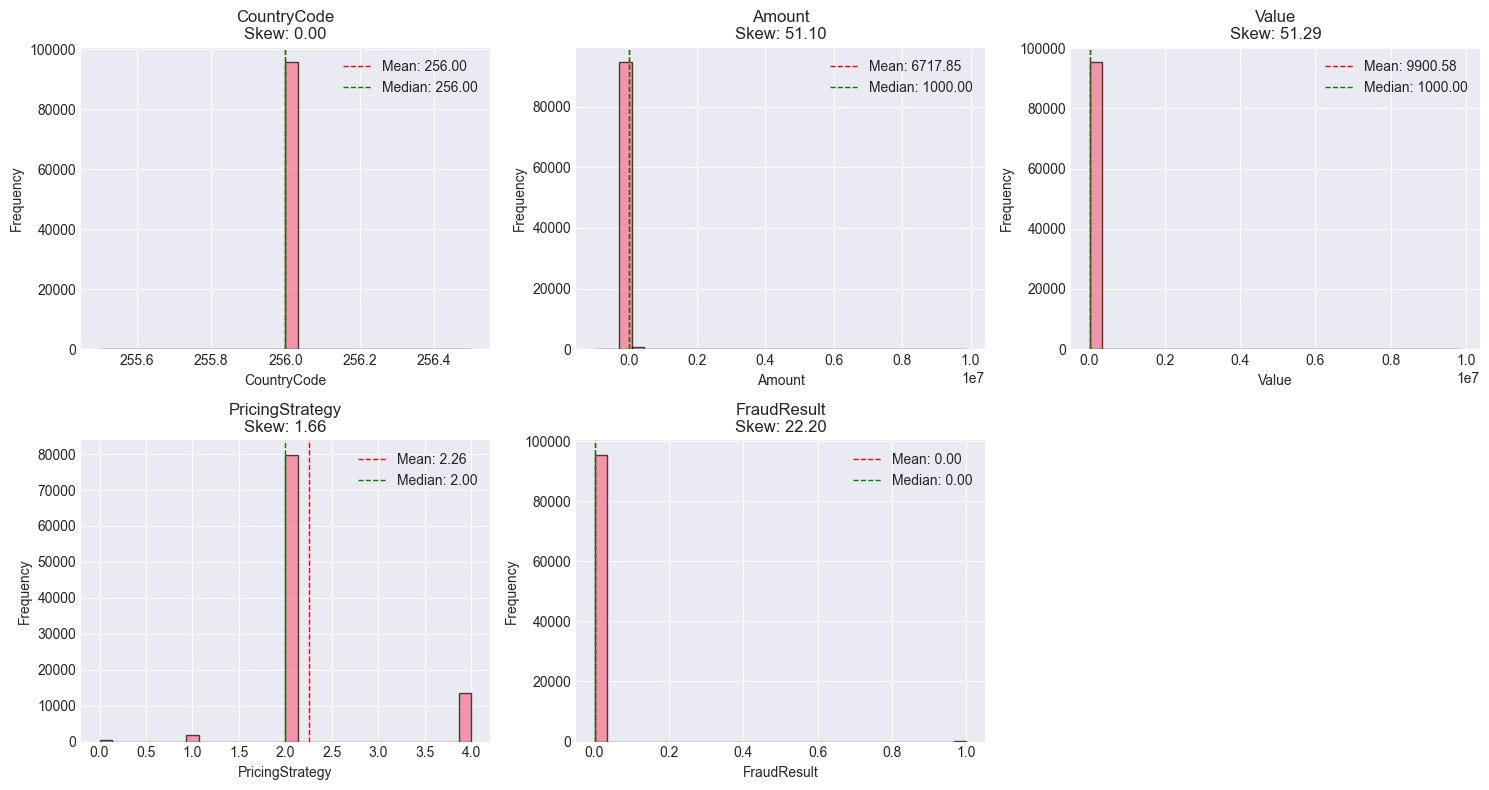

📈 Saved: numerical_distributions.png


In [17]:
print("=== DISTRIBUTION OF NUMERICAL FEATURES ===")

if len(num_cols) > 0:
    # Create subplots
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        if i < len(axes):
            # Histogram with KDE
            ax = axes[i]
            df[col].hist(ax=ax, bins=30, edgecolor='black', alpha=0.7)
            
            # Add vertical line for mean
            ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean: {df[col].mean():.2f}')
            ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=1, label=f'Median: {df[col].median():.2f}')
            
            ax.set_title(f'{col}\nSkew: {df[col].skew():.2f}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.legend()
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('../reports/figures/numerical_distributions.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("📈 Saved: numerical_distributions.png")
else:
    print("No numerical columns found for distribution analysis")


#### Distribution of Categorical Features

=== DISTRIBUTION OF CATEGORICAL FEATURES ===


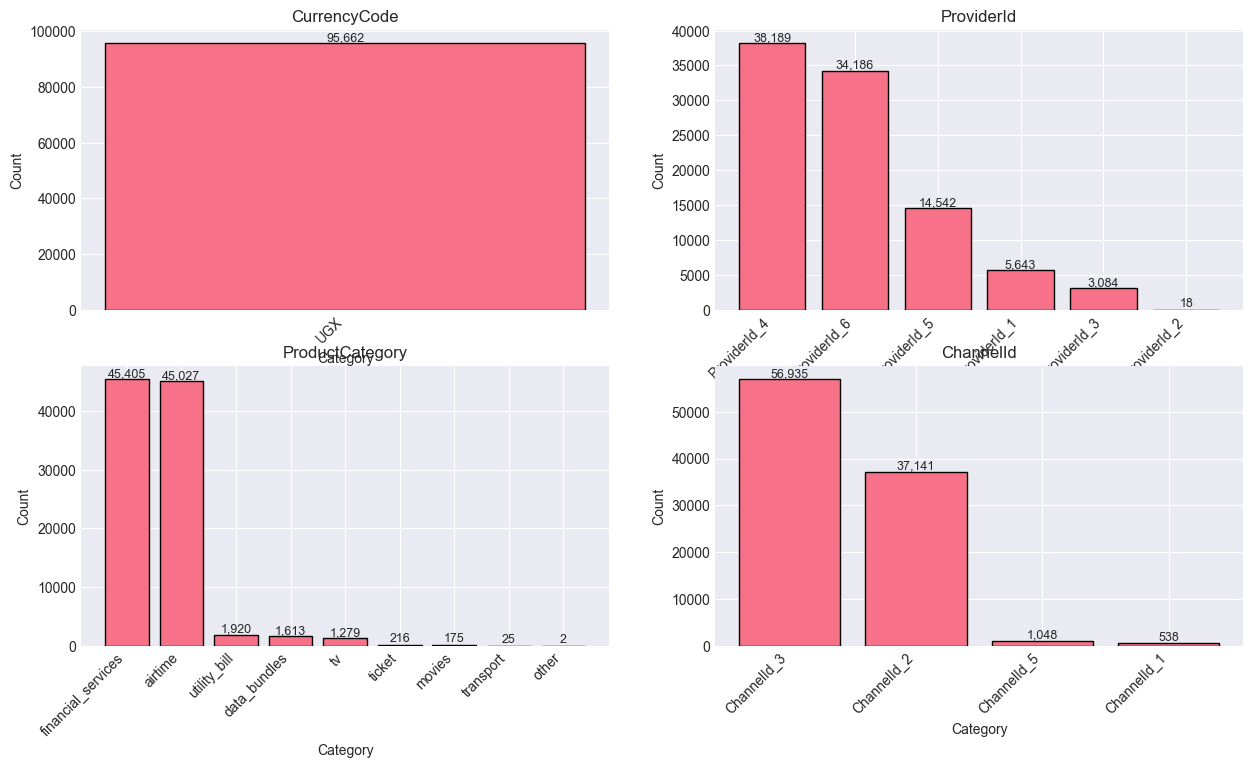

📈 Saved: categorical_distributions.png


In [18]:
print("=== DISTRIBUTION OF CATEGORICAL FEATURES ===")

# Filter categorical columns with reasonable number of categories
cat_cols_filtered = [col for col in cat_cols if df[col].nunique() <= 20]

if len(cat_cols_filtered) > 0:
    n_cols = 2
    n_rows = (len(cat_cols_filtered) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_cols_filtered):
        if i < len(axes):
            ax = axes[i]
            value_counts = df[col].value_counts()
            
            # Show top 10 categories if many
            if len(value_counts) > 10:
                value_counts = value_counts.head(10)
                ax.set_title(f'{col} (Top 10)')
            else:
                ax.set_title(f'{col}')
                
            bars = ax.bar(range(len(value_counts)), value_counts.values, edgecolor='black')
            ax.set_xlabel('Category')
            ax.set_ylabel('Count')
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
            
            # Add count labels on bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}', ha='center', va='bottom', fontsize=9)
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
        plt.tight_layout()
    plt.savefig('../reports/figures/categorical_distributions.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("📈 Saved: categorical_distributions.png")
else:
    print("No categorical columns with ≤20 unique values")


#### Correlation Analysis

=== CORRELATION ANALYSIS ===


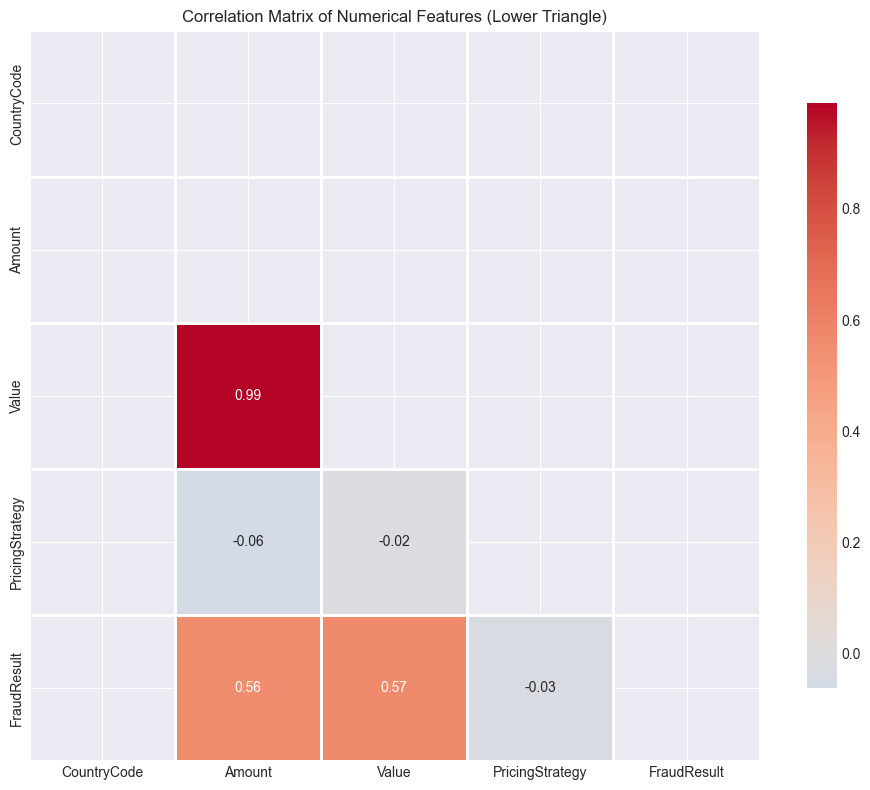

📈 Saved: correlation_matrix.png

• Top Correlations (absolute value > 0.5):


Correlation
Amount      Value           0.989692
Value       Amount          0.989692
            FraudResult     0.566739
FraudResult Value           0.566739
Amount      FraudResult     0.557370
FraudResult Amount          0.557370

In [19]:
print("=== CORRELATION ANALYSIS ===")

if len(num_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = df[num_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features (Lower Triangle)')
    plt.tight_layout()
    plt.savefig('../reports/figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("📈 Saved: correlation_matrix.png")
    
    # Find high correlations
    print("\n• Top Correlations (absolute value > 0.5):")
    corr_pairs = corr_matrix.unstack()
    high_corr = corr_pairs[(abs(corr_pairs) > 0.5) & (corr_pairs < 1)]
    
    if not high_corr.empty:
        high_corr_df = pd.DataFrame(high_corr.sort_values(ascending=False), 
                                   columns=['Correlation'])
        display(high_corr_df.head(10))
    else:
        print("No strong correlations (> 0.5) found")
else:
    print("Not enough numerical columns for correlation analysis")

#### Identifying Missing Values

In [20]:
print("=== IDENTIFYING MISSING VALUES ===")

# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Create missing values dataframe
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    bars = plt.barh(missing_df.index, missing_df['Missing %'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.gca().invert_yaxis()  # Highest on top
    
    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center')
    
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('../reports/figures/missing_values.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("📈 Saved: missing_values.png")
else:
    print("✅ No missing values found in the dataset")

=== IDENTIFYING MISSING VALUES ===
✅ No missing values found in the dataset


#### Outlier Detection

=== OUTLIER DETECTION ===


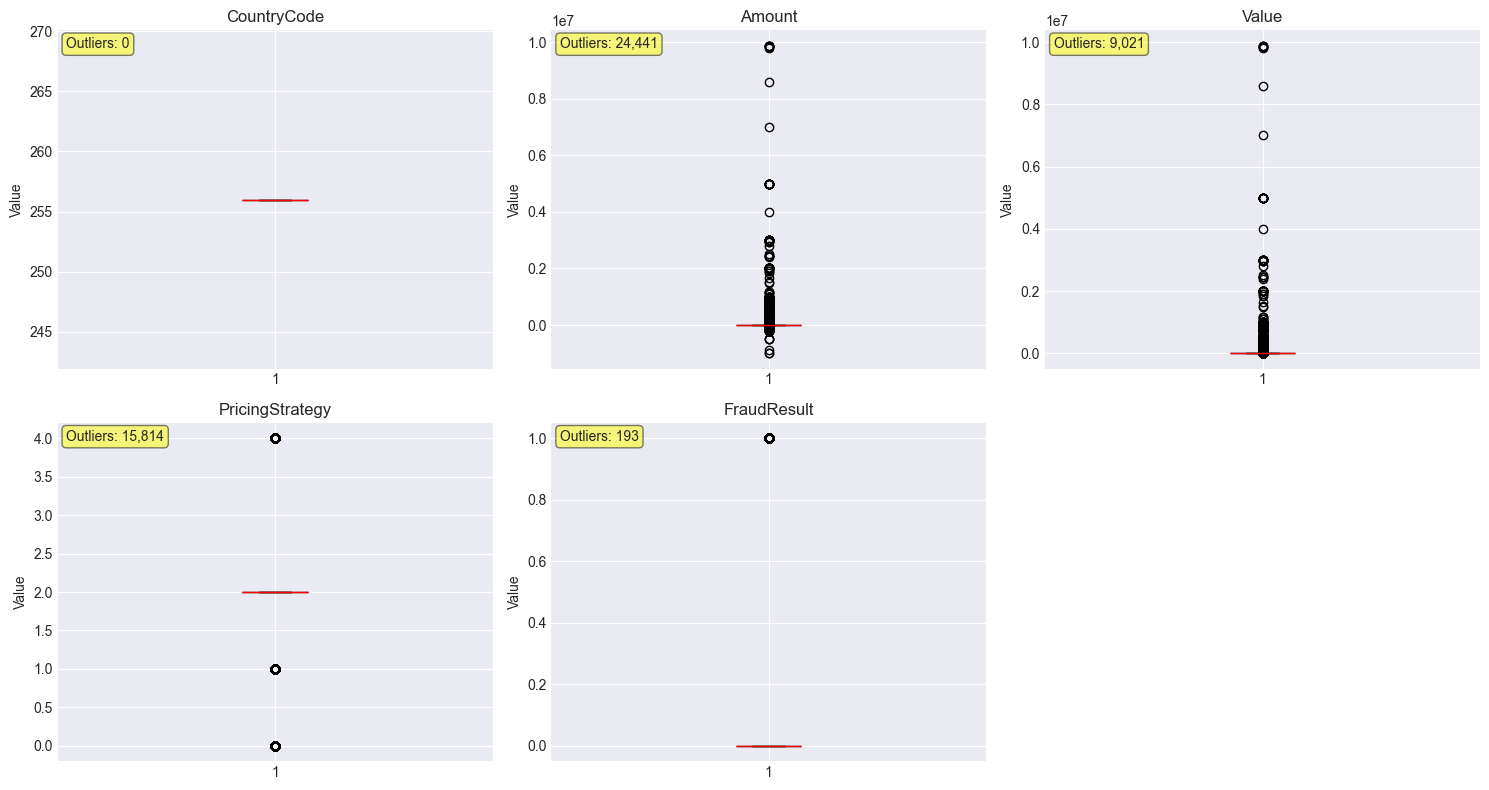

📈 Saved: outlier_detection.png

• Outlier Count (IQR method - beyond 1.5×IQR):


,Column,Outliers,Outlier %,Min,Q1,Median,Q3,Max
0,CountryCode,0,0.0%,256.0,256.0,256.0,256.0,256.0
1,Amount,24441,25.5%,-1000000.0,-50.0,1000.0,2800.0,9880000.0
2,Value,9021,9.4%,2.0,275.0,1000.0,5000.0,9880000.0
3,PricingStrategy,15814,16.5%,0.0,2.0,2.0,2.0,4.0
4,FraudResult,193,0.2%,0.0,0.0,0.0,0.0,1.0


In [21]:
print("=== OUTLIER DETECTION ===")

if len(num_cols) > 0:
    # Create box plots
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        if i < len(axes):
            ax = axes[i]
            bp = ax.boxplot(df[col].dropna(), patch_artist=True)
            
            # Customize boxplot
            bp['boxes'][0].set_facecolor('lightblue')
            bp['medians'][0].set_color('red')
            
            ax.set_title(f'{col}')
            ax.set_ylabel('Value')
            
            # Calculate outliers using IQR method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            # Add outlier count as text
            ax.text(0.02, 0.98, f'Outliers: {len(outliers):,}',
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('../reports/figures/outlier_detection.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("📈 Saved: outlier_detection.png")
    
    # Quantitative outlier analysis
    print("\n• Outlier Count (IQR method - beyond 1.5×IQR):")
    outlier_summary = []
    for col in num_cols[:10]:  # Limit to first 10 for brevity
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100
        outlier_summary.append({
            'Column': col,
            'Outliers': len(outliers),
            'Outlier %': f'{outlier_pct:.1f}%',
            'Min': df[col].min(),
            'Q1': Q1,
            'Median': df[col].median(),
            'Q3': Q3,
            'Max': df[col].max()
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)
else:
    print("No numerical columns for outlier detection")

#### Insights

In [26]:
# === TOP 5 INSIGHTS ===
print("="*60)
print("TOP 5 INSIGHTS FROM EDA")
print("="*60)

insights = []

# Insight 1: Data quality and scale
insights.append("1. **High-Quality Transaction Data**: 95,662 transactions across 3,742 unique customers with ZERO missing values. All data in UGX currency (CountryCode 256).")

# Insight 2: Fraud patterns
fraud_rate = df['FraudResult'].mean() * 100
fraud_count = df['FraudResult'].sum()
insights.append(f"2. **Low Fraud Rate but High-Value Correlation**: Only {fraud_rate:.2f}% ({fraud_count:,} transactions) are fraudulent, but fraud strongly correlates with transaction amount (r=0.56). High-value transactions warrant scrutiny.")

# Insight 3: Transaction patterns
amount_skew = df['Amount'].skew()
insights.append(f"3. **Extreme Transaction Skew**: Amount distribution extremely skewed (skew: {amount_skew:.2f}). Mean transaction: UGX {df['Amount'].mean():,.0f}, Median: UGX {df['Amount'].median():,.0f}. High percentage of outliers indicates heavy-tailed distribution.")

# Insight 4: Customer behavior
insights.append("4. **Provider & Channel Concentration**: Top 2 providers (ProviderId_4: 39.9%, ProviderId_6: 35.7%) handle 75.6% of transactions. ChannelId_3 dominates (59.5% of transactions). Financial services (47.5%) and airtime (47.1%) are primary product categories.")

# Insight 5: Feature relationships
insights.append("5. **Amount-Value Near-Perfect Correlation**: Amount and Value correlation = 0.99 (expected as Value = |Amount|). Consider dropping one to avoid multicollinearity.")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"\n{i}. {insight}")

print("\n" + "="*60)
print("FEATURE ENGINEERING PRIORITIES:")
print("="*60)
print("1. **Create RFM features**: Recency, Frequency, Monetary at customer level")
print("2. **Handle outliers**: Cap/winsorize Amount (extreme skew: 51.10)")
print("3. **Time features**: Extract hour, day, month from TransactionStartTime")
print("4. **Encode categoricals**: One-hot for ProductCategory, ChannelId, ProviderId")
print("5. **Target creation**: Cluster customers by RFM for proxy risk label")
print("="*60)

# Save insights to file
with open('../reports/figures/eda_insights.txt', 'w') as f:
    f.write("EDA INSIGHTS SUMMARY\n")
    f.write("="*50 + "\n")
    for insight in insights:
        f.write(f"{insight}\n\n")
print("\n📝 Insights saved: ../reports/eda_insights.txt")

TOP 5 INSIGHTS FROM EDA

1. 1. **High-Quality Transaction Data**: 95,662 transactions across 3,742 unique customers with ZERO missing values. All data in UGX currency (CountryCode 256).

2. 2. **Low Fraud Rate but High-Value Correlation**: Only 0.20% (193 transactions) are fraudulent, but fraud strongly correlates with transaction amount (r=0.56). High-value transactions warrant scrutiny.

3. 3. **Extreme Transaction Skew**: Amount distribution extremely skewed (skew: 51.10). Mean transaction: UGX 6,718, Median: UGX 1,000. High percentage of outliers indicates heavy-tailed distribution.

4. 4. **Provider & Channel Concentration**: Top 2 providers (ProviderId_4: 39.9%, ProviderId_6: 35.7%) handle 75.6% of transactions. ChannelId_3 dominates (59.5% of transactions). Financial services (47.5%) and airtime (47.1%) are primary product categories.

5. 5. **Amount-Value Near-Perfect Correlation**: Amount and Value correlation = 0.99 (expected as Value = |Amount|). Consider dropping one to avo